<a href="https://colab.research.google.com/github/vaibhavsundharam/Reinforcement-Learning/blob/master/Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [64]:
env = gym.make("FrozenLake-v0")

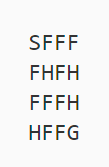
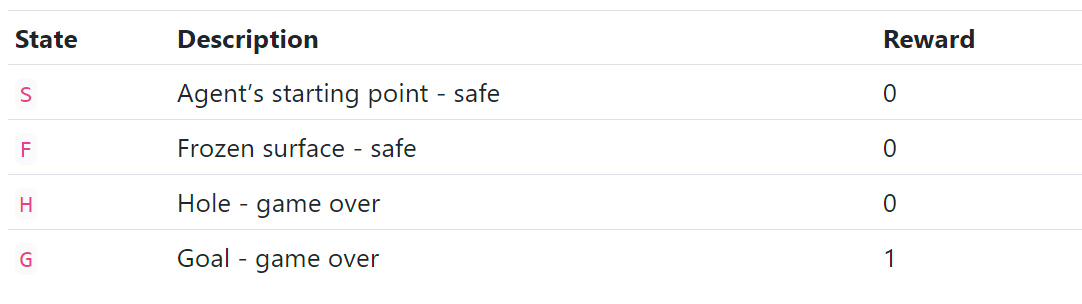

In [65]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


#Training

In [66]:
max_episodes = 20000 # maximum episodes the agent will play
max_steps_per_episode = 100 # maximum steps/episode, after which the episode will terminate

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

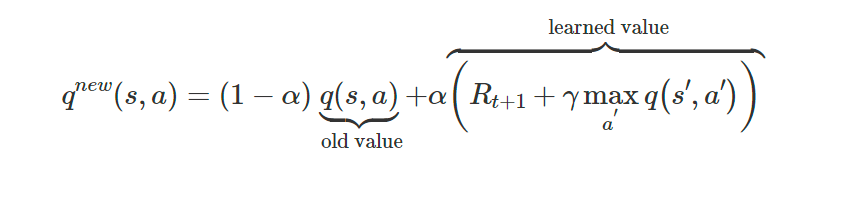

In [67]:
rewards_all_episodes = []
#Q-Learning algorithm
for episode in range(max_episodes): # iterating through each episode
  state = env.reset() # resetting the state of the environment  
  done = False
  rewards_current_episode = 0 # for keepig track of the current episode's rewards  
  for step in range(max_steps_per_episode): #going through each time step
    threshold = random.uniform(0,1)
    if threshold > exploration_rate:
      action = np.argmax(q_table[state,:]) #exploit the environment
    else:
      action = env.action_space.sample()
      
    new_state, reward, done, info = env.step(action) # based on the action, take the next step
    # Update Q-table for Q(s,a)
    q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
    state = new_state
    rewards_current_episode += reward 
    if done == True: 
      break
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes.append(rewards_current_episode)

In [68]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),max_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.05300000000000004
2000 :  0.22400000000000017
3000 :  0.4040000000000003
4000 :  0.5720000000000004
5000 :  0.6260000000000004
6000 :  0.6590000000000005
7000 :  0.6820000000000005
8000 :  0.6920000000000005
9000 :  0.6980000000000005
10000 :  0.6880000000000005
11000 :  0.6680000000000005
12000 :  0.6670000000000005
13000 :  0.6920000000000005
14000 :  0.7140000000000005
15000 :  0.6710000000000005
16000 :  0.6680000000000005
17000 :  0.6810000000000005
18000 :  0.6860000000000005
19000 :  0.7120000000000005
20000 :  0.6500000000000005


In [69]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.56876979 0.4925851  0.50444913 0.5178475 ]
 [0.32525333 0.41438    0.29932162 0.51182251]
 [0.40167133 0.40219037 0.40272377 0.47377083]
 [0.32483898 0.30936202 0.2939688  0.44210205]
 [0.59640216 0.40920151 0.21813394 0.35354891]
 [0.         0.         0.         0.        ]
 [0.18524233 0.15901996 0.38941163 0.09132523]
 [0.         0.         0.         0.        ]
 [0.35235957 0.44136669 0.42536137 0.62886099]
 [0.35353834 0.71308457 0.5351368  0.45735076]
 [0.58818612 0.39442063 0.32214048 0.35394189]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.41532661 0.5554814  0.79777551 0.45837553]
 [0.74149194 0.92397696 0.72636636 0.71271619]
 [0.         0.         0.         0.        ]]


#Testing

In [71]:
for episode in range(3):
  state = env.reset()
  done = False
  print("*****EPISODE ", episode+1, "*****\n\n\n\n")
  time.sleep(1)
  for step in range(max_steps_per_episode):
    clear_output(wait=True)
    env.render()
    time.sleep(0.4)
    action = np.argmax(q_table[state,:])
    new_state, reward, done, info = env.step(action)
    if done:
      clear_output(wait=True)
      env.render()
      if reward == 1:
          print("****You reached the goal!****")
          time.sleep(3)
      else:
          print("****You fell through a hole!****")
          time.sleep(3)
          clear_output(wait=True)
      break
    state = new_state
env.close()


  (Down)
SFFF
FHFH
FFFH
HFFG
****You reached the goal!****
